# Análises e Resultados

# Importações

In [23]:
import pandas as pd
#import numpy as np
#from datetime import datetime
import matplotlib.pyplot as plt

### Leitura CSV

In [41]:
staff_store = pd.read_csv("staff_store.csv")
alugueis = pd.read_csv("alugueis.csv")
df1 = pd.read_csv("df1.csv")
customer_completa = pd.read_csv("customer_completa.csv")
film = pd.read_csv("film.csv")
film_actor = pd.read_csv("film_actor.csv")
film_category = pd.read_csv("film_category.csv")
category = pd.read_csv("category.csv")
actor = pd.read_csv("actor.csv")

In [42]:
actor.head()

,actor_id,first_name,last_name,last_update
0,1,Penelope,Guiness,2013-05-26 14:47:57.620
1,2,Nick,Wahlberg,2013-05-26 14:47:57.620
2,3,Ed,Chase,2013-05-26 14:47:57.620
3,4,Jennifer,Davis,2013-05-26 14:47:57.620
4,5,Johnny,Lollobrigida,2013-05-26 14:47:57.620


In [32]:
# Dropando a coluna "last_update" 
film = film.drop(columns='last_update')
film_actor = film_actor.drop(columns='last_update')
film_category = film_category.drop(columns='last_update')
category = category.drop(columns='last_update')
actor = actor.drop(columns='last_update')

In [43]:
actor = actor.drop(columns='last_update')

## Análises

#### Quais são os gêneros de filmes com melhor desempenho em termos de receita?

In [33]:
# Passo 1: Agrupar por categoria de filme e realizar a operação de soma da receita
grupo_por_categoria = alugueis.groupby('name')['replacement_cost'].sum().reset_index()

# Passo 2: Ordenar os resultados em ordem decrescente pela receita total
grupo_por_categoria = grupo_por_categoria.sort_values(by='replacement_cost', ascending=False)

# Exibir os resultados
print(grupo_por_categoria)

           name  replacement_cost
14       Sports          16595.90
1     Animation          16360.92
0        Action          16325.24
13       Sci-Fi          16261.33
6         Drama          16102.53
5   Documentary          15238.66
7        Family          15180.43
9         Games          13589.39
3      Classics          13564.52
2      Children          13240.45
8       Foreign          13228.89
12          New          12615.61
4        Comedy          12119.60
10       Horror          11395.18
15       Travel          11027.23
11        Music          11019.26


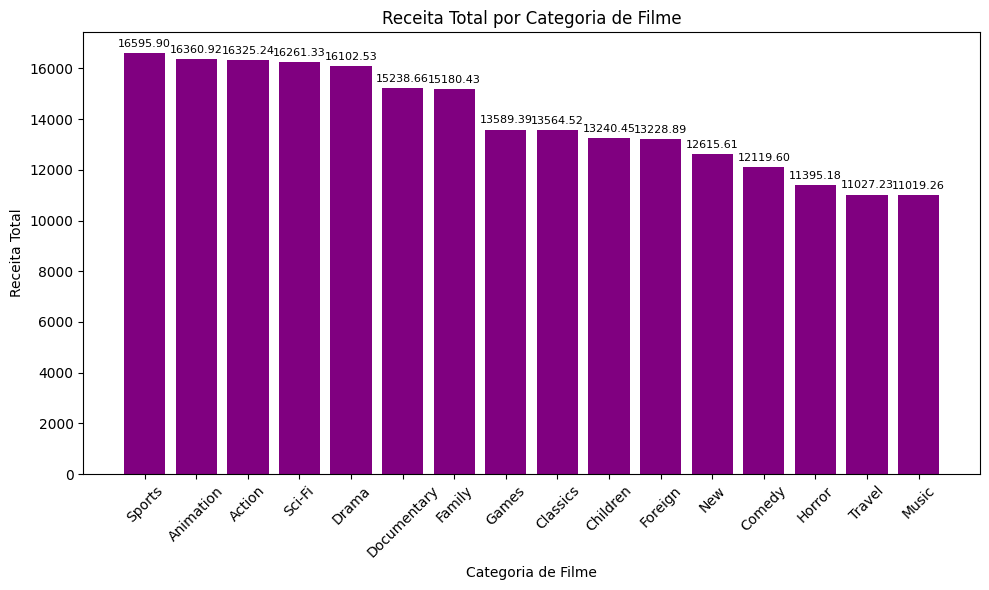

In [34]:
# Criando um gráfico de barras com a cor roxa
plt.figure(figsize=(10, 6))
bars = plt.bar(grupo_por_categoria['name'], grupo_por_categoria['replacement_cost'], color='purple')

# Adicionar rótulos nas colunas (categorias de filme)
plt.xlabel('Categoria de Filme')
plt.ylabel('Receita Total')
plt.title('Receita Total por Categoria de Filme')
plt.xticks(grupo_por_categoria['name'], grupo_por_categoria['name'].values, rotation=45)

# Adicionar os totais acima de cada coluna
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                 textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Quais as categorias de filmes que os atores/atrizes mais participam ?

In [37]:
# Concatenando a tabela "film" + "film_actor" + "film_category", para conter filme, ator e categoria na mesma tabela
film_completa = film.merge(film_actor, on=['film_id'], how='inner').merge(film_category, on=['film_id'], how='inner')

# Exibir a tabela completa resultante (Film_completa)
film_completa.head(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,actor_id,category_id
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...,29,12
1,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...,60,12
2,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...,68,12


In [38]:
# Dropando colunas desnecessárias para análise
film_completa = film_completa.drop(columns=['rating'])
film_completa = film_completa.drop(columns=['special_features'])
film_completa = film_completa.drop(columns=['fulltext'])


# Exibir a tabela completa resultante (Film_completa)
film_completa.head()

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,category_id
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,29,12
1,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,60,12
2,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,68,12
3,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,107,12
4,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,132,12


In [39]:
# Verificando a quantidade de valores nulos (NaN) ou em branco em cada coluna
valores_nulos = film_completa.isnull().sum()
print("Quantidade de valores nulos (NaN) ou em branco em cada coluna:")
print(valores_nulos)

Quantidade de valores nulos (NaN) ou em branco em cada coluna:
film_id             0
title               0
description         0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
actor_id            0
category_id         0
dtype: int64


In [44]:
actor.head()

,actor_id,first_name,last_name
0,1,Penelope,Guiness
1,2,Nick,Wahlberg
2,3,Ed,Chase
3,4,Jennifer,Davis
4,5,Johnny,Lollobrigida


In [45]:
# Concatenando as colunas "first_name" e "last_name" em uma única coluna chamada "full_name"
actor['full_name'] = actor.apply(lambda row: f"{row['first_name']} {row['last_name']}", axis=1)

# Exibir o DataFrame "actor" com a nova coluna "full_name"
print(actor)

     actor_id first_name     last_name            full_name
0           1   Penelope       Guiness     Penelope Guiness
1           2       Nick      Wahlberg        Nick Wahlberg
2           3         Ed         Chase             Ed Chase
3           4   Jennifer         Davis       Jennifer Davis
4           5     Johnny  Lollobrigida  Johnny Lollobrigida
..        ...        ...           ...                  ...
195       196       Bela        Walken          Bela Walken
196       197      Reese          West           Reese West
197       198       Mary        Keitel          Mary Keitel
198       199      Julia       Fawcett        Julia Fawcett
199       200      Thora        Temple         Thora Temple

[200 rows x 4 columns]


In [47]:
# Juntar o DataFrame "film_completa" com o DataFrame "actor" usando a coluna "actor_id"
df_merged = pd.merge(film_completa, actor, on='actor_id', how='left')

# Exibir o DataFrame resultante
df_merged.head(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,category_id,first_name,last_name,full_name
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,29,12,Alec,Wayne,Alec Wayne
1,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,60,12,Henry,Berry,Henry Berry
2,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,68,12,Rip,Winslet,Rip Winslet


In [51]:
# Dropando colunas desnecessárias para análise
df_merged = df_merged.drop(columns=['first_name'])
df_merged = df_merged.drop(columns=['last_name'])

In [52]:
df_merged.head(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,category_id,full_name
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,29,12,Alec Wayne
1,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,60,12,Henry Berry
2,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,68,12,Rip Winslet


In [53]:
# Verificar a quantidade de valores nulos (NaN) ou em branco em cada coluna
valores_nulos = df_merged.isnull().sum()
print("Quantidade de valores nulos (NaN) ou em branco em cada coluna:")
print(valores_nulos)

Quantidade de valores nulos (NaN) ou em branco em cada coluna:
film_id             0
title               0
description         0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
actor_id            0
category_id         0
full_name           0
dtype: int64


### Como a duração média do aluguel varia em diferentes categorias de filmes?